In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Inspect the first and last snapshots in the scan

In [2]:
snapshot=np.load("snapshots/single_board_snapshot1630819418.078231.npy")

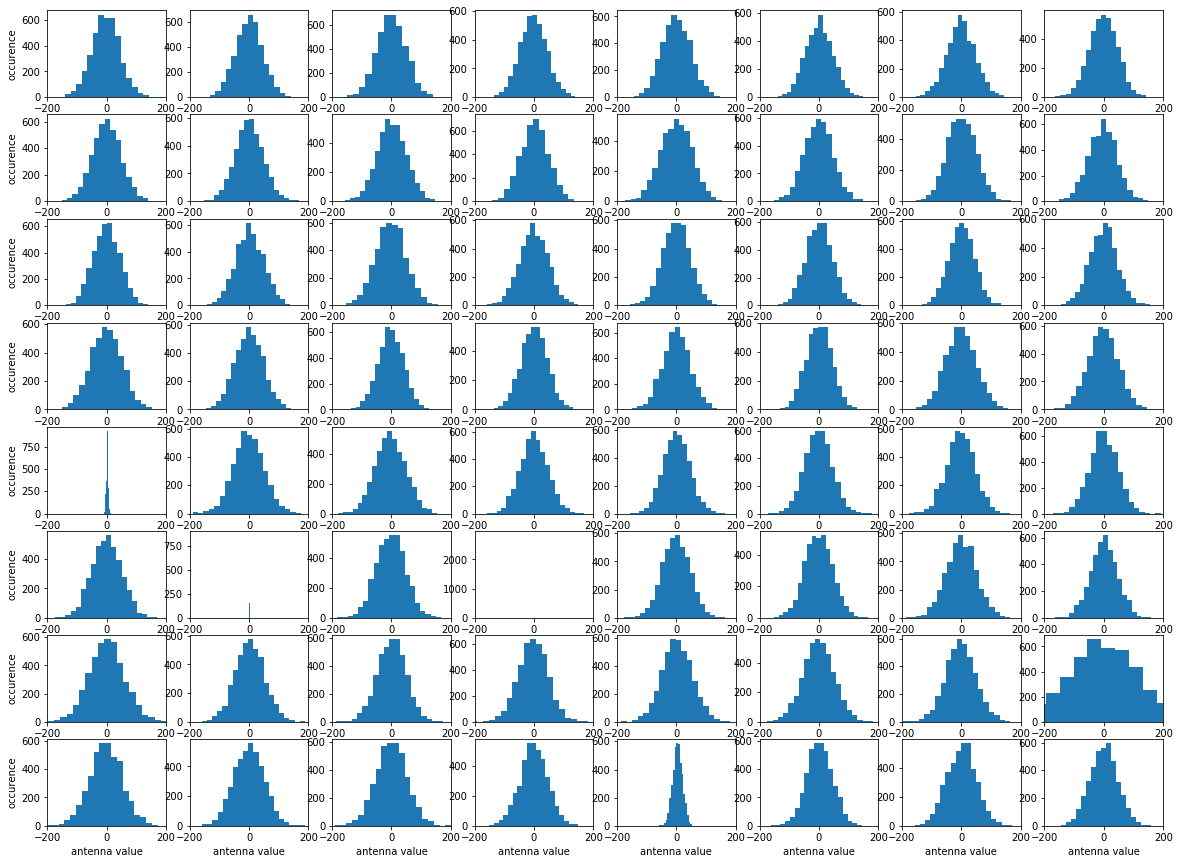

In [3]:
#plot histogram
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.hist(snapshot[:,i+4],20)
    plt.xlim(-200,200)
    if i > 55:
        plt.xlabel('antenna value')
    if i%8==0:
        plt.ylabel('occurence')

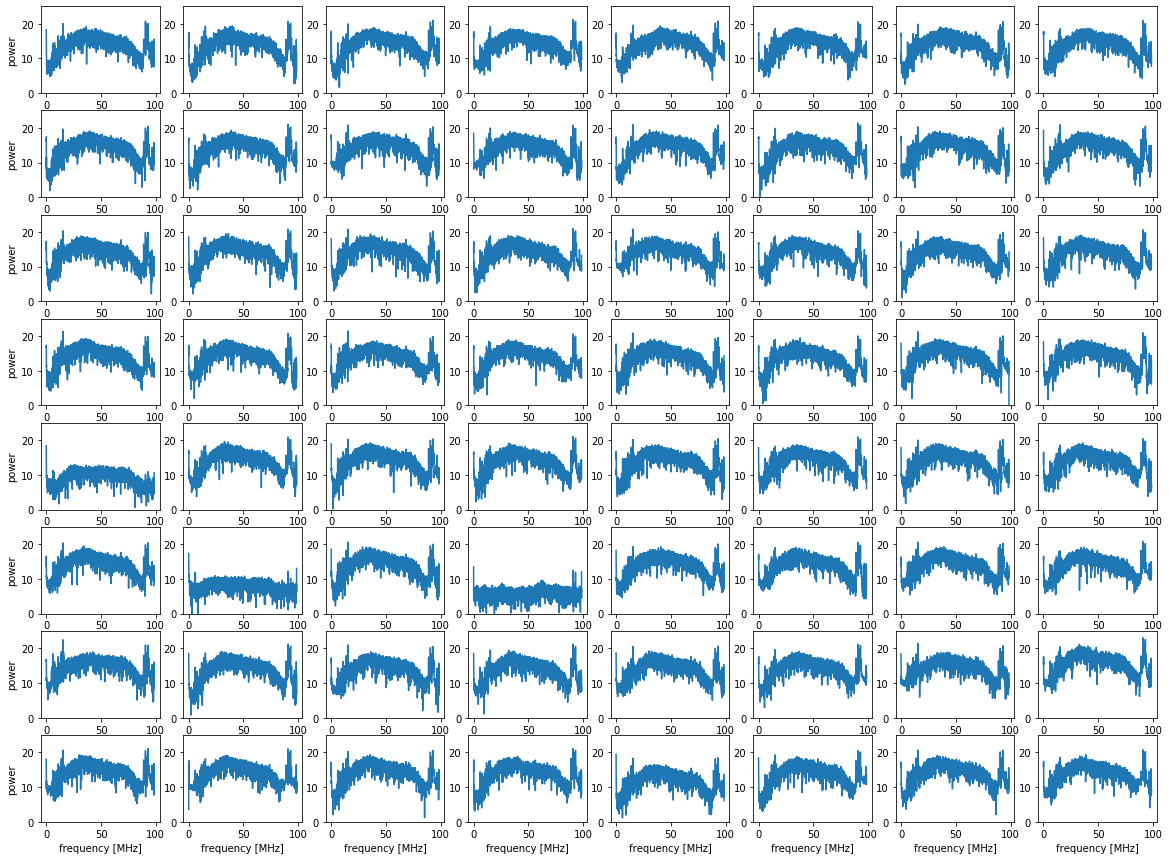

In [4]:
#plot spectra
fbins=np.linspace(0,197/2,int(1+4096/2))

plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    spec=np.fft.rfft(snapshot[:,i+4])
    plt.plot(fbins,np.log(np.square(np.abs(spec))))
    plt.ylim(0,25)
    if i > 55:
        plt.xlabel('frequency [MHz]')
    if i%8==0:
        plt.ylabel('power')

### Last snapshot

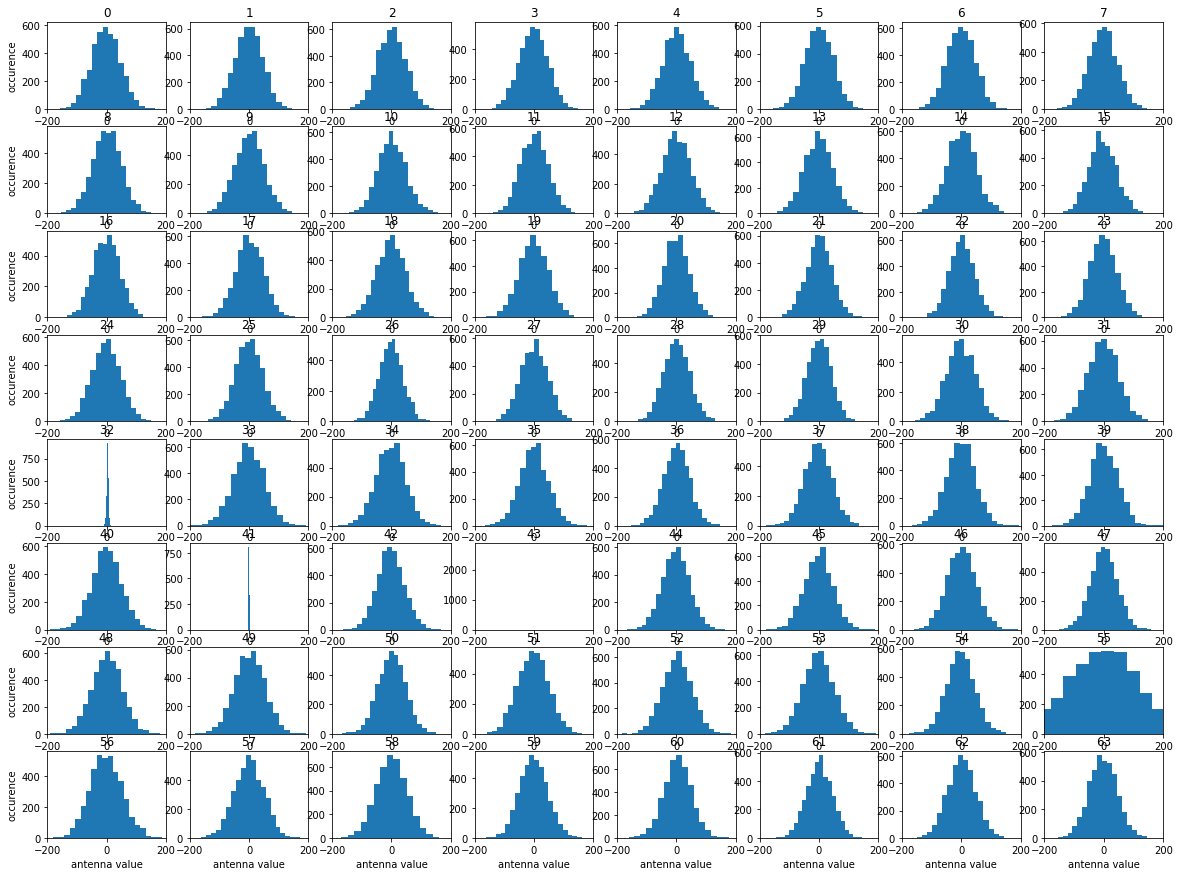

In [5]:
snapshot=np.load("snapshots/single_board_snapshot1630907420.5314093.npy")
#plot histogram
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.title(i)
    plt.hist(snapshot[:,i+4],20)
    plt.xlim(-200,200)
    if i > 55:
        plt.xlabel('antenna value')
    if i%8==0:
        plt.ylabel('occurence')

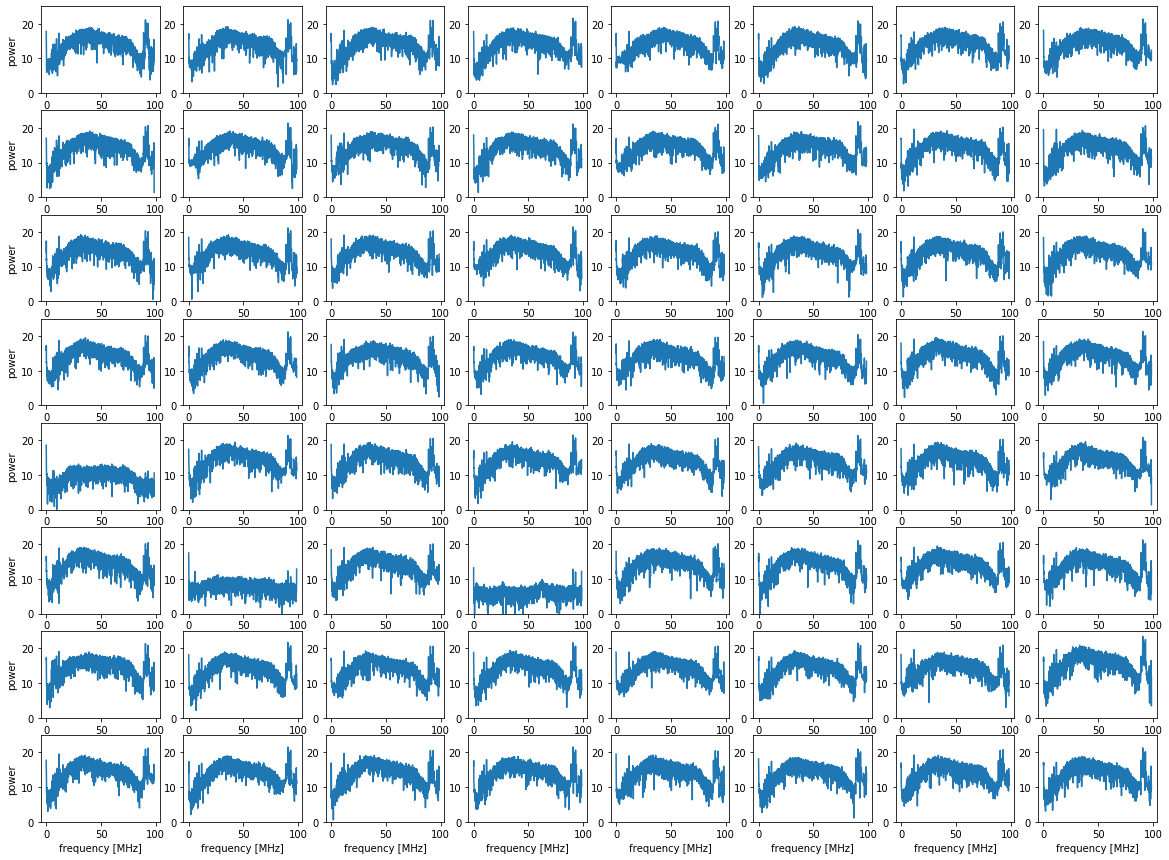

In [6]:
#plot spectra
fbins=np.linspace(0,197/2,int(1+4096/2))

plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    spec=np.fft.rfft(snapshot[:,i+4])
    plt.plot(fbins,np.log(np.square(np.abs(spec))))
    plt.ylim(0,25)
    if i > 55:
        plt.xlabel('frequency [MHz]')
    if i%8==0:
        plt.ylabel('power')

## Waterfall plots

In [7]:
with open("ls_snapshots.txt") as f:
    fnames=f.readlines()

In [8]:
Nchan=2049
Nant = 64
Nsnapshot = 1440


dynamicspectra=np.zeros((Nchan,Nsnapshot,Nant))
with open("ls_snapshots.txt") as f:
    fnames=f.readlines()
    
for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    snapshot=np.load("snapshots/"+fname)
    for i in range(Nant):
        spec=np.fft.rfft(snapshot[:,i+4])
        logpower = np.log(np.square(np.abs(spec)))
        dynamicspectra[:,j,i] = logpower


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


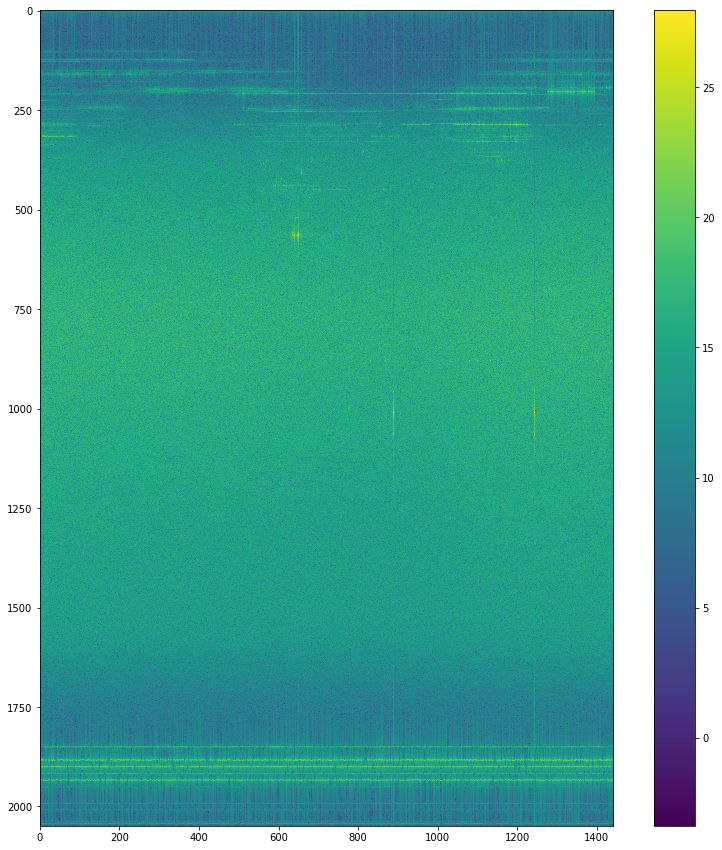

In [16]:
plt.figure(figsize=(15,15))
plt.imshow(dynamicspectra[:,:,0],interpolation='None')
plt.colorbar()

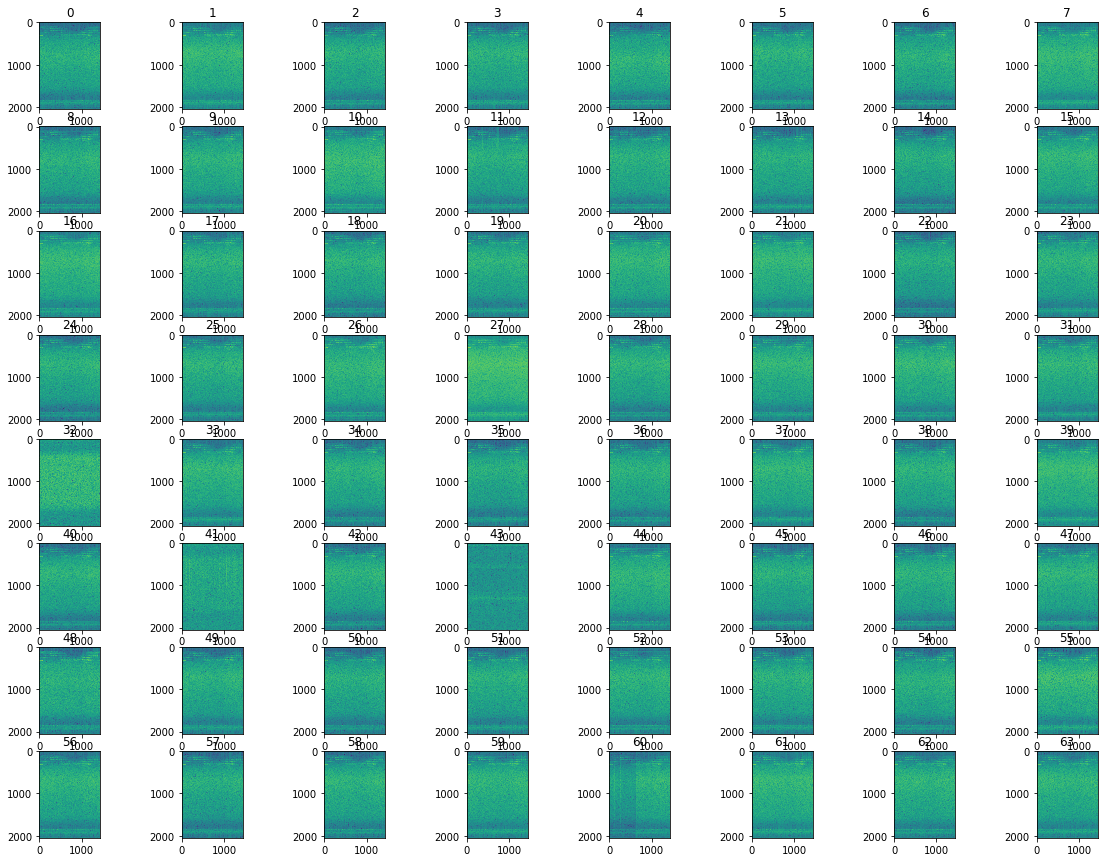

In [10]:
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.imshow(dynamicspectra[:,:,i],interpolation='None')
    plt.title(i)

plt.show()
    
    

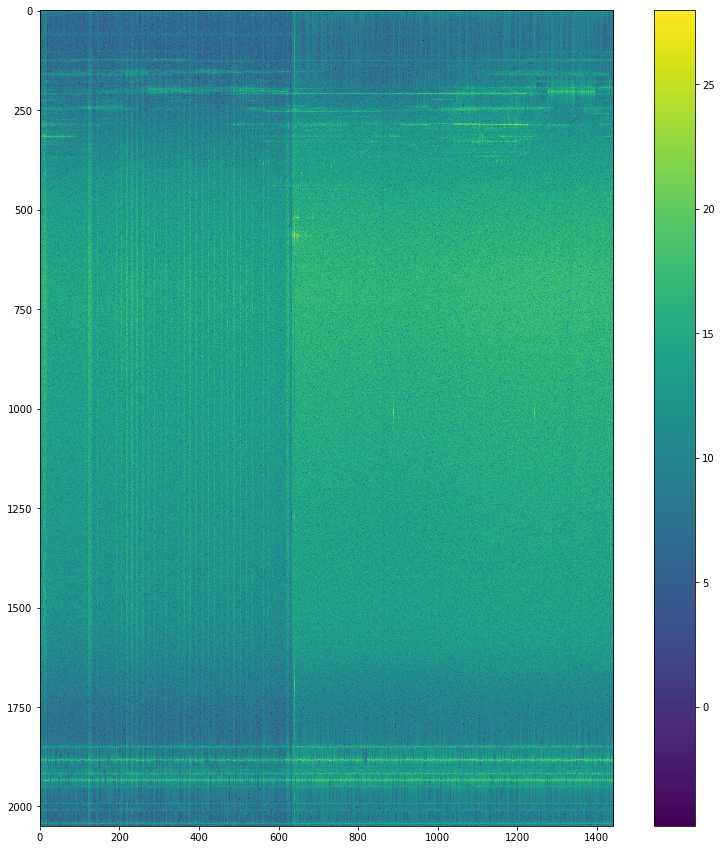

In [17]:
plt.figure(figsize=(15,15))
plt.imshow(dynamicspectra[:,:,60],interpolation='None')
plt.colorbar()

### work on time axis label

In [12]:
name='single_board_snapshot1630819418.078231.npy'
t=float(name[-21:-4])
utcstruct=time.gmtime(t)
print(time.asctime(utcstruct))
print(utcstruct)

Sun Sep  5 05:23:38 2021
time.struct_time(tm_year=2021, tm_mon=9, tm_mday=5, tm_hour=5, tm_min=23, tm_sec=38, tm_wday=6, tm_yday=248, tm_isdst=0)


## Timeseries standard deviation over time

In [13]:
Nant = 64
Nsnapshot = 1440


sdevs=np.zeros((Nsnapshot,Nant))
with open("ls_snapshots.txt") as f:
    fnames=f.readlines()
    
for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    snapshot=np.load("snapshots/"+fname)
    for i in range(Nant):
        sdevs[j,i]=np.std(snapshot[:,i+4])
     

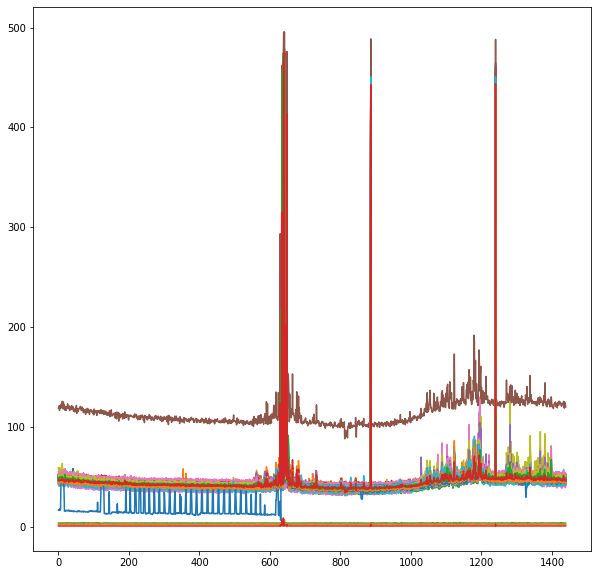

In [14]:
plt.figure(figsize=(10,10))
for i in range(64):
    plt.plot(sdevs[:,i])
plt.show()

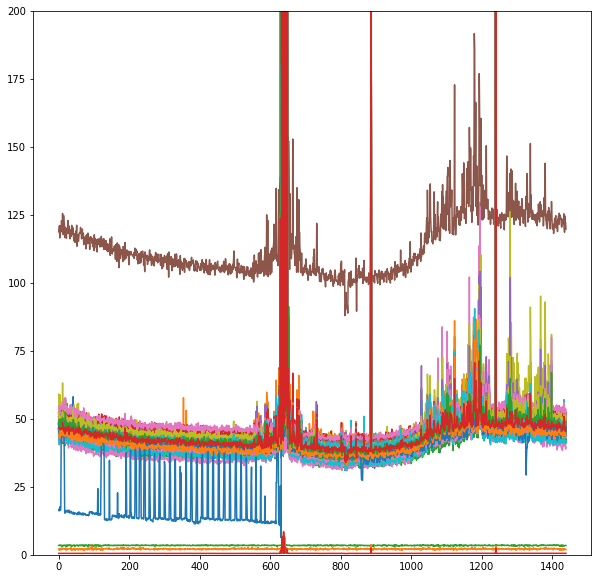

In [15]:
plt.figure(figsize=(10,10))
for i in range(64):
    plt.plot(sdevs[:,i])
    plt.ylim(0,200)
plt.show()

Next steps:

nice axes

higher order moments

is something saturating at the especially bad time where other channels look like power decreases

what is going on with antenna 60 and why does it stop

compare with and without FIR

look for 200 kHz tone
